# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data

df = pd.read_csv('Data/df_merged.csv', index_col=0)
df.shape

/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_10292/3890047312.py:3: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_merged.csv', index_col=0)


(82690, 11)

### Drop not useful columns

In [3]:
df_drop = df.drop(columns=['GENENAME', 'UNIPROID', 'SF-UNIID', 'SCOPCLA', 'Highest_status'])

In [4]:
df_drop.shape

(82690, 6)

### NaN values

In [5]:
# Nan values
df_drop.isna().sum()

KEGG pathway name    49203
Targettype           40619
BIOCLASS             42918
ECNUMBER             64267
PDBSTRUC             13883
MOA                  37816
dtype: int64

In [6]:
# drop all rows with more than 3 NaN value?
df_filtered_nan = df_drop[df_drop.isna().sum(axis=1) <= 3]


In [7]:
df_filtered_nan.isna().sum()

KEGG pathway name     7960
Targettype             185
BIOCLASS              1909
ECNUMBER             22442
PDBSTRUC              8965
MOA                    426
dtype: int64

In [8]:
df_filtered_nan.shape

(40841, 6)

In [9]:
df_filtered_nan.head()

,KEGG pathway name,Targettype,BIOCLASS,ECNUMBER,PDBSTRUC,MOA
TTDID,,,,,,
T00039,Hippo signaling pathway,Clinical Trial target,mRNA target,NaN,NaN,.
T01777,"cGMP-PKG signaling pathway, Neuroactive ligand...",Successful target,GPCR rhodopsin,NaN,NaN,Modulator
T01777,"cGMP-PKG signaling pathway, Neuroactive ligand...",Successful target,GPCR rhodopsin,NaN,NaN,Modulator
T01777,"cGMP-PKG signaling pathway, Neuroactive ligand...",Successful target,GPCR rhodopsin,NaN,NaN,Agonist
T01777,"cGMP-PKG signaling pathway, Neuroactive ligand...",Successful target,GPCR rhodopsin,NaN,NaN,Agonist


### Replace EC numbers with enzyme classes respectively

- Category:Oxidoreductases (EC 1)
- Category:Transferases (EC 2)
- Category:Hydrolases (EC 3)
- Category:Lyases (EC 4)
- Category:Isomerases (EC 5)
- Category:Ligases (EC 6)

In [10]:
import re

df_ecnumb = df_filtered_nan
df_ecnumb['ECNUMBER'].value_counts()

EC 2.7.10.1     1588
EC 2.7.11.1     1048
EC 4.2.1.1       954
EC 3.5.1.98      776
EC 2.7.10.2      717
                ... 
EC 3.1.3.-         1
EC 4.1.99.12       1
EC 2.7.1.138       1
EC 1.1.1.95        1
EC 3.5.4.38        1
Name: ECNUMBER, Length: 587, dtype: int64

In [11]:
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 1.*', 'Oxidoreductases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 2.*', 'Transferases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 3.*', 'Hydrolases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 4.*', 'Lyases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 5.*', 'Isomerases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 6.*', 'Ligases')
df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 7.*', 'Translocases')


/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_10292/3348217260.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 1.*', 'Oxidoreductases')
/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_10292/3348217260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 1.*', 'Oxidoreductases')
/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_10292/3348217260.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ecnumb['ECNUMBER'] = df_ecnumb['ECNUMBER'].str.replace(r'EC 2.*', 'Transferases')
/var/folder

In [12]:
df_ecnumb['ECNUMBER'].value_counts()

Transferases       6915
Hydrolases         5692
Oxidoreductases    4173
Lyases             1134
Isomerases          357
Ligases              65
Translocases         63
Name: ECNUMBER, dtype: int64

### Rename columns

In [13]:
df_rencol = df_ecnumb
# show column names
df_rencol.columns

Index(['KEGG pathway name', 'Targettype', 'BIOCLASS', 'ECNUMBER', 'PDBSTRUC',
       'MOA'],
      dtype='object')

In [14]:
df_rencol = df_rencol.rename(columns={'Targettype': 'Target_type', 'KEGG pathway name': 'KEGG_pathway', 'BIOCLASS':'Biochemical_class', 'ECNUMBER':'Enzyme_class', 'PDBSTRUC':'PDB_structure', 'MOA':'Mode_of_action'})

In [15]:
df_rencol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40841 entries, T00039 to T99990
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   KEGG_pathway       32881 non-null  object
 1   Target_type        40656 non-null  object
 2   Biochemical_class  38932 non-null  object
 3   Enzyme_class       18399 non-null  object
 4   PDB_structure      31876 non-null  object
 5   Mode_of_action     40415 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


### Delete duplicates

In [16]:
# show duplicates
df_dups = df_rencol.duplicated().sum()
df_dups

36340

In [17]:
# remove duplicates
df_drop_dups = df_rencol.drop_duplicates()
df_drop_dups.shape

(4501, 6)

In [18]:
df_drop_dups.duplicated().sum()

0

In [19]:
df_drop_dups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4501 entries, T00039 to T99990
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   KEGG_pathway       2854 non-null   object
 1   Target_type        4472 non-null   object
 2   Biochemical_class  3958 non-null   object
 3   Enzyme_class       1712 non-null   object
 4   PDB_structure      3505 non-null   object
 5   Mode_of_action     4122 non-null   object
dtypes: object(6)
memory usage: 246.1+ KB


In [20]:
df_drop_dups.isna().sum()

KEGG_pathway         1647
Target_type            29
Biochemical_class     543
Enzyme_class         2789
PDB_structure         996
Mode_of_action        379
dtype: int64

# New column for classification model

In [21]:
# Add new column with 1= successful target, 0= discontinued target, 0.5 = target under investigation
df_new = df_drop_dups
df_new['Outcome'] = df_new['Target_type'].apply(lambda x: 1 if x == 'Successful target' else 0 if x == 'Discontinued target' else 0.5)


/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_10292/314389812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Outcome'] = df_new['Target_type'].apply(lambda x: 1 if x == 'Successful target' else 0 if x == 'Discontinued target' else 0.5)


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4501 entries, T00039 to T99990
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KEGG_pathway       2854 non-null   object 
 1   Target_type        4472 non-null   object 
 2   Biochemical_class  3958 non-null   object 
 3   Enzyme_class       1712 non-null   object 
 4   PDB_structure      3505 non-null   object 
 5   Mode_of_action     4122 non-null   object 
 6   Outcome            4501 non-null   float64
dtypes: float64(1), object(6)
memory usage: 281.3+ KB


# Safe dataframe

In [23]:
# save df
df_new.to_csv('Data/df_proteintargets_targettype.csv', sep=',', index=False)

In [24]:
# save df only with "failed" and "approved" proteins

df_only = df_new[df_new['Outcome'] != 0.5]
df_only = df_only.drop(columns=["Target_type"])

df_only.to_csv('Data/df_proteintargets_targettype_appr_fail.csv', sep=',', index=False)

In [25]:
df_only['Outcome'].value_counts()

1.0    1688
0.0      85
Name: Outcome, dtype: int64

# Visualization

In [26]:
import seaborn as sns

df_proteintargets = df_drop_dups
df_proteintargets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4501 entries, T00039 to T99990
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KEGG_pathway       2854 non-null   object 
 1   Target_type        4472 non-null   object 
 2   Biochemical_class  3958 non-null   object 
 3   Enzyme_class       1712 non-null   object 
 4   PDB_structure      3505 non-null   object 
 5   Mode_of_action     4122 non-null   object 
 6   Outcome            4501 non-null   float64
dtypes: float64(1), object(6)
memory usage: 281.3+ KB


In [27]:
df_proteintargets['Target_type'].value_counts()

Successful target        1688
Clinical Trial target    1566
Research target           922
Patented target           176
Discontinued target        85
Preclinical target         35
Name: Target_type, dtype: int64

Text(0.5, 1.0, 'Protein targets in different stages')

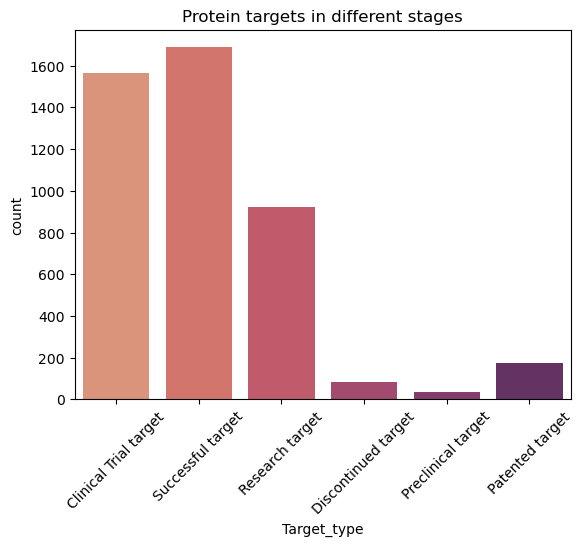

In [28]:
# get an overview of dataset:
    # imbalaced data
#order = ['Research target','Preclinical target','Patented targets', 'Clinical Trial targets', 'Successful target', 'Discontinued target']
sns.countplot(data=df_proteintargets, x='Target_type', palette='flare')
plt.xticks(rotation=45)
plt.title('Protein targets in different stages')


In [29]:
# Statement: Which Bioclass and MOA belong the most failed tragets to?

# select only the failed targets
df_failed = df_proteintargets[df_proteintargets['Target_type'] == 'Discontinued target']

# group by Bioclass and MOA and count the number of failed targets
grouped1 = df_failed.groupby(['Biochemical_class']).size().reset_index(name='count')
grouped2 = df_failed.groupby(['Mode_of_action']).size().reset_index(name='count')

# sort the groups in descending order of failed targets
sorted_groups1 = grouped1.sort_values('count', ascending=False)
sorted_groups2 = grouped2.sort_values('count', ascending=False)


# select only the top 5 Bioclasses and MOAs
top_groups1 = sorted_groups1.head(3)
top_groups2 = sorted_groups2.head(3)

In [30]:
grouped1

,Biochemical_class,count
0,Acyltransferase,1
1,Alkyl aryl transferase,2
2,Basic leucine zipper bZIP,1
3,CH/CH(2) oxidoreductase,1
4,Carbon-carbon lyase,1
5,Carbon-nitrogen ligase,2
6,Endoribonucleases,1
7,GPCR glutamate,5
8,GPCR rhodopsin,15
9,Glycosylase,1


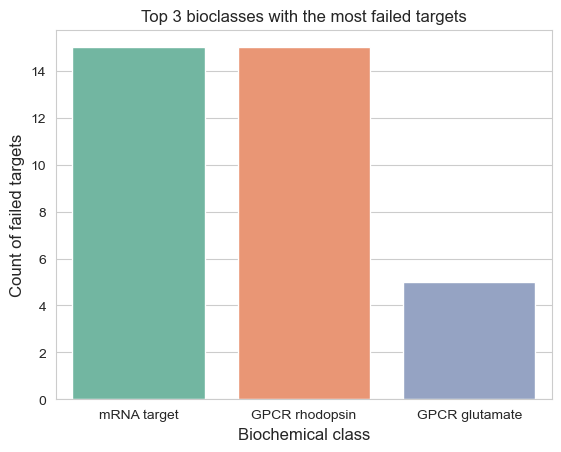

In [38]:
sns.set_style('whitegrid')
sns.barplot(data=top_groups1, x='Biochemical_class', y='count', palette='Set2')
plt.title('Top 3 bioclasses with the most failed targets')
plt.xlabel('Biochemical class', fontsize=12)
plt.ylabel('Count of failed targets', fontsize= 12)
plt.show()

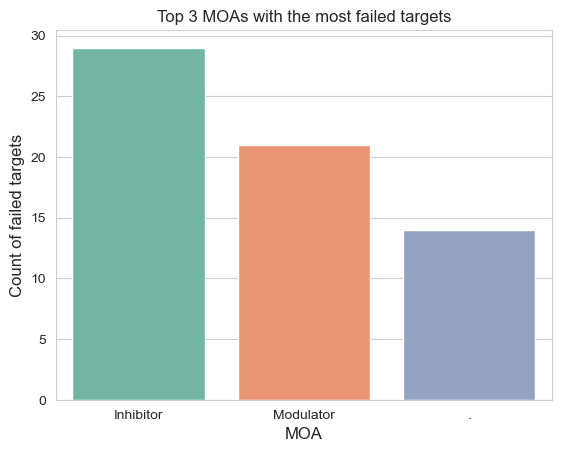

In [32]:
sns.set_style('whitegrid')
sns.barplot(data=top_groups2, x='Mode_of_action', y='count', palette='Set2')
plt.title('Top 3 MOAs with the most failed targets')
plt.xlabel('MOA', fontsize=12)
plt.ylabel('Count of failed targets', fontsize= 12)
plt.show()

In [33]:
# Statement: Which Bioclass and MOA belong the most approved tragets to?

# select only the approved targets
df_approved = df_proteintargets[df_proteintargets['Target_type'] == 'Successful target']

# group by Bioclass and MOA and count the number of approved targets
grouped_approved1 = df_approved.groupby(['Biochemical_class']).size().reset_index(name='count')
grouped_approved2 = df_approved.groupby(['Mode_of_action']).size().reset_index(name='count')

# sort the groups in descending order of approved targets
sorted_groups_approved1 = grouped_approved1.sort_values('count', ascending=False)
sorted_groups_approved2 = grouped_approved2.sort_values('count', ascending=False)

# select only the top 3 Bioclasses and MOAs
top_groups_approved1 = sorted_groups_approved1.head(3)
top_groups_approved2 = sorted_groups_approved2.head(3)

In [34]:
grouped_approved1

,Biochemical_class,count
0,ABC transporter,22
1,ATP-hydrolyzing DNA topoisomerase,6
2,Acid anhydride hydrolase,1
3,Acid anhydrides hydrolase,9
4,Acyltransferase,10
...,...,...
113,Transient receptor potential catioin channel,16
114,Type I cytokine receptor family,5
115,Type-B carboxylesterase/lipase,3
116,Voltage-gated ion channel,52


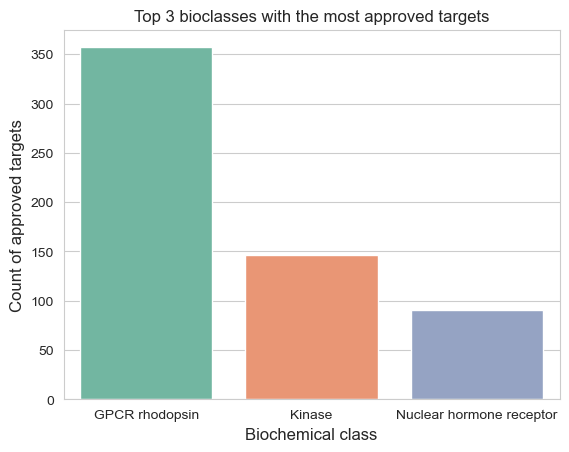

In [39]:
sns.set_style('whitegrid')
sns.barplot(data=top_groups_approved1, x='Biochemical_class', y='count', palette='Set2')
plt.title('Top 3 bioclasses with the most approved targets')
plt.xlabel('Biochemical class', fontsize= 12)
plt.ylabel('Count of approved targets', fontsize= 12)
plt.show()

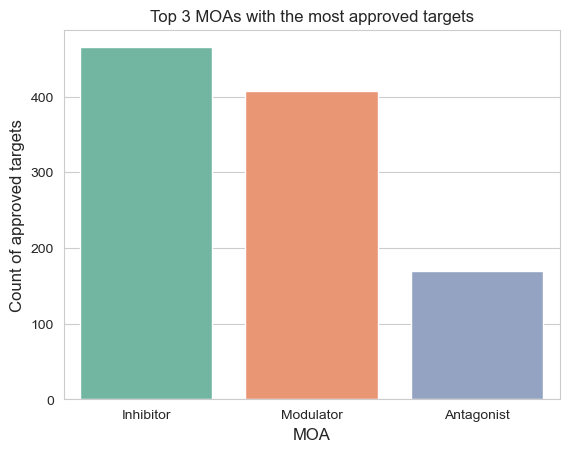

In [66]:
sns.set_style('whitegrid')
sns.barplot(data=top_groups_approved2, x='Mode_of_action', y='count', palette='Set2')
plt.title('Top 3 MOAs with the most approved targets')
plt.xlabel('MOA', fontsize= 12)
plt.ylabel('Count of approved targets', fontsize= 12)
plt.show()